In [1]:
# Load required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from KUtils.eda import chartil
from KUtils.common import utils as cutils

from KUtils.common import utils
from KUtils.eda import chartil
from KUtils.eda import data_preparation as dp

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, recall_score, precision_score

In [2]:
adult_income_df = pd.read_csv('cleaned.csv')

In [3]:
adult_income_df_dummy_converted_df = cutils.createDummies(adult_income_df, dummies_creation_drop_column_preference='dropMin', exclude_columns=['target'])


In [4]:
from sklearn.preprocessing import MinMaxScaler
numerical_column_names = ['age','fnlwgt','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = MinMaxScaler()

adult_income_df_dummy_converted_df[numerical_column_names] = scaler.fit_transform(
    adult_income_df_dummy_converted_df[numerical_column_names])

C:\Users\keshav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [5]:
adult_income_df_dummy_converted_df.head()

age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.301370  0.369201       0.800000       0.02174           0.0   
1  0.452055  0.384604       0.800000       0.00000           0.0   
2  0.287671  0.587798       0.533333       0.00000           0.0   
3  0.493151  0.605907       0.400000       0.00000           0.0   
4  0.150685  0.684072       0.800000       0.00000           0.0   

   hours-per-week  target  workclass_ Federal-gov  workclass_ Local-gov  \
0        0.397959   <=50K                       0                     0   
1        0.122449   <=50K                       0                     0   
2        0.397959   <=50K                       0                     0   
3        0.397959   <=50K                       0                     0   
4        0.397959   <=50K                       0                     0   

   workclass_ Private              ...                \
0                   0              ...                 
1                   0              ...                 
2                   1              ...                 
3                   1              ...                 
4                   1              ...                 

   relationship_ Not-in-family  relationship_ Own-child  \
0                            1                        0   
1                            0                        0   
2                            1                        0   
3                            0                        0   
4                            0                        0   

   relationship_ Unmarried  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                        0                   0                         0   
1                        0                   0                         0   
2                        0                   0                         0   
3                        0                   0                         0   
4                        0                   1                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ White  sex_ Male  \
0                         0            0            1          1   
1                         0            0            1          1   
2                         0            0            1          1   
3                         0            1            0          1   
4                         0            1            0          0   

   native-country_ United-States  
0                              1  
1                              1  
2                              1  
3                              1  
4                              0  

[5 rows x 58 columns]

In [6]:
adult_income_df_dummy_converted_df['target'] = adult_income_df_dummy_converted_df['target'].map(
    {' >50K':1, ' <=50K':0})

In [7]:
adult_income_df_dummy_converted_df.tail()

age    fnlwgt  education-num  capital-gain  capital-loss  \
30713  0.136986  0.625531       0.733333      0.000000           0.0   
30714  0.315068  0.516383       0.533333      0.000000           0.0   
30715  0.561644  0.512946       0.533333      0.000000           0.0   
30716  0.068493  0.573291       0.533333      0.000000           0.0   
30717  0.479452  0.649557       0.533333      0.150242           0.0   

       hours-per-week  target  workclass_ Federal-gov  workclass_ Local-gov  \
30713        0.377551       0                       0                     0   
30714        0.397959       1                       0                     0   
30715        0.397959       0                       0                     0   
30716        0.193878       0                       0                     0   
30717        0.397959       1                       0                     0   

       workclass_ Private              ...                \
30713                   1              ...                 
30714                   1              ...                 
30715                   1              ...                 
30716                   1              ...                 
30717                   0              ...                 

       relationship_ Not-in-family  relationship_ Own-child  \
30713                            0                        0   
30714                            0                        0   
30715                            0                        0   
30716                            0                        1   
30717                            0                        0   

       relationship_ Unmarried  relationship_ Wife  race_ Amer-Indian-Eskimo  \
30713                        0                   1                         0   
30714                        0                   0                         0   
30715                        1                   0                         0   
30716                        0                   0                         0   
30717                        0                   1                         0   

       race_ Asian-Pac-Islander  race_ Black  race_ White  sex_ Male  \
30713                         0            0            1          0   
30714                         0            0            1          1   
30715                         0            0            1          0   
30716                         0            0            1          1   
30717                         0            0            1          0   

       native-country_ United-States  
30713                              1  
30714                              1  
30715                              1  
30716                              1  
30717                              1  

[5 rows x 58 columns]

In [8]:
adult_income_df_dummy_converted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30718 entries, 0 to 30717
Data columns (total 58 columns):
age                                      30718 non-null float64
fnlwgt                                   30718 non-null float64
education-num                            30718 non-null float64
capital-gain                             30718 non-null float64
capital-loss                             30718 non-null float64
hours-per-week                           30718 non-null float64
target                                   30718 non-null int64
workclass_ Federal-gov                   30718 non-null uint8
workclass_ Local-gov                     30718 non-null uint8
workclass_ Private                       30718 non-null uint8
workclass_ Self-emp-inc                  30718 non-null uint8
workclass_ Self-emp-not-inc              30718 non-null uint8
workclass_ State-gov                     30718 non-null uint8
education_ 10th                          30718 non-null uint8
education_ 

In [9]:
adult_income_df_dummy_converted_df['target'] = adult_income_df_dummy_converted_df['target'].astype('int')

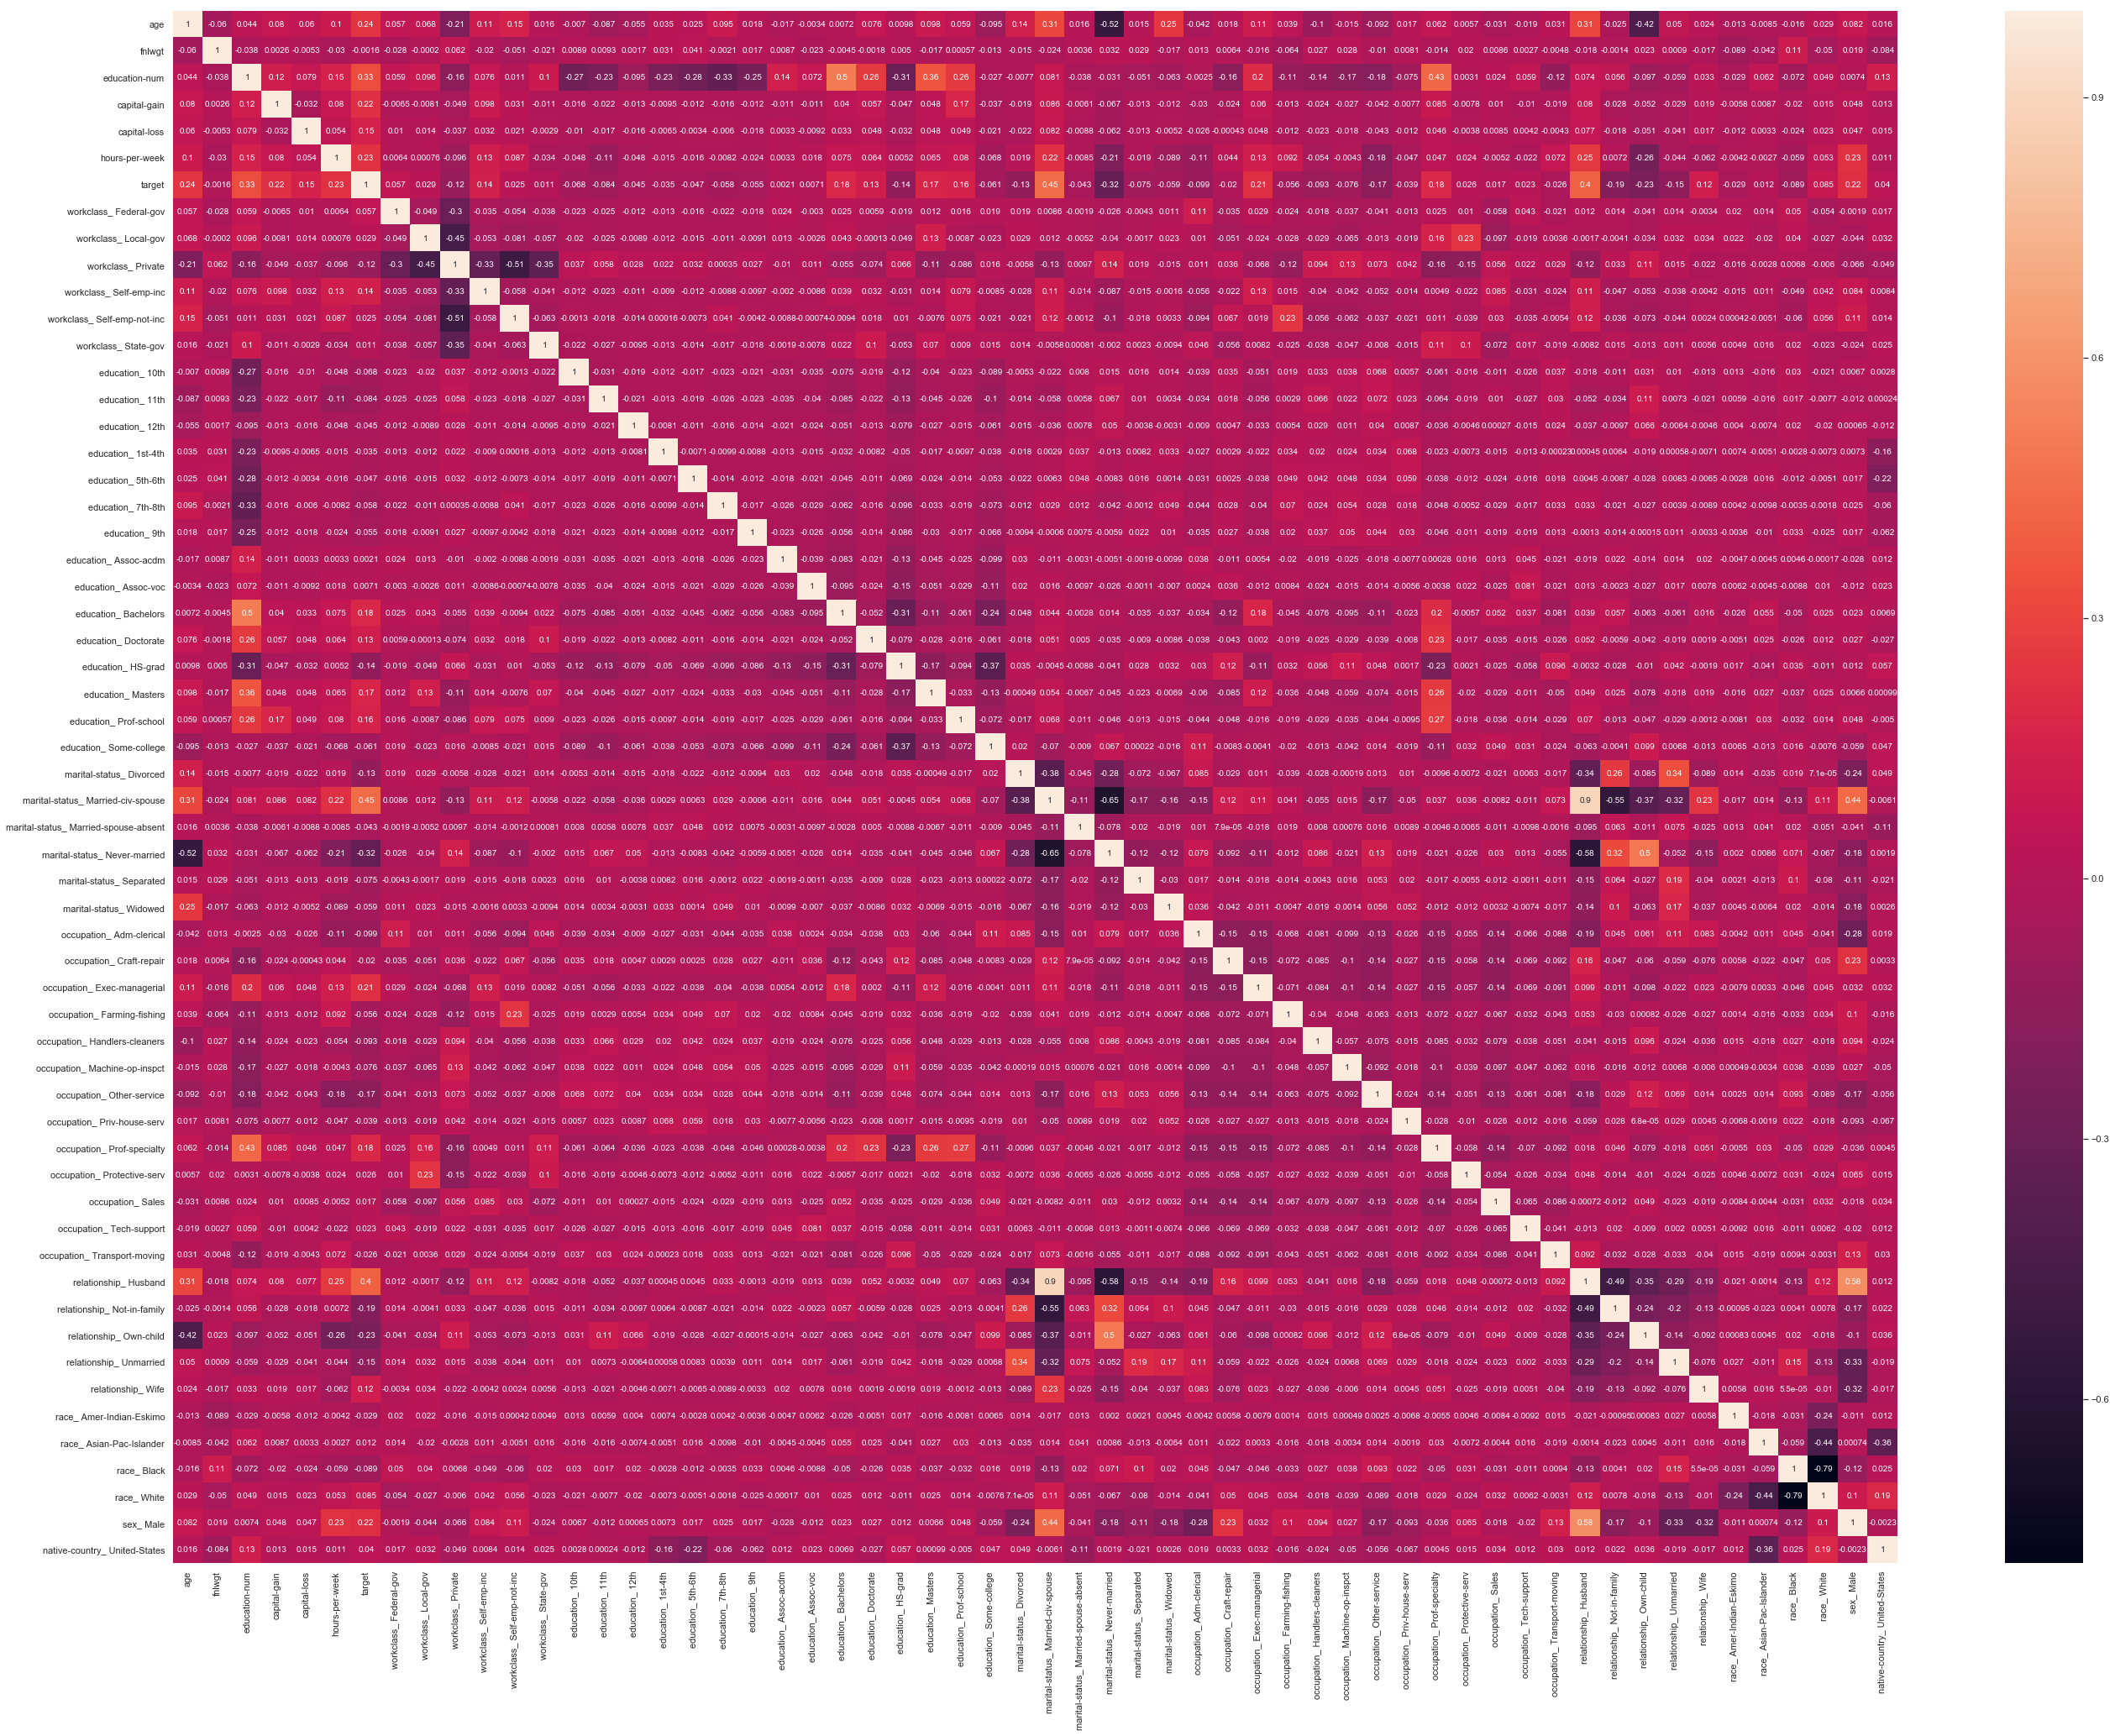

In [10]:
chartil.plot(adult_income_df_dummy_converted_df, adult_income_df_dummy_converted_df.columns)

In [11]:
# convert target variable income to categorical
adult_income_df_dummy_converted_df['target'] = adult_income_df_dummy_converted_df['target'].astype('category')

X = adult_income_df_dummy_converted_df.drop('target', axis=1)
y = adult_income_df_dummy_converted_df['target'] 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=43)

In [13]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
# Check the evaluation metrics of our default model

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6972
           1       0.78      0.55      0.64      2244

   micro avg       0.85      0.85      0.85      9216
   macro avg       0.82      0.75      0.77      9216
weighted avg       0.84      0.85      0.84      9216



In [15]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6617  355]
 [1019 1225]]
0.8509114583333334


In [16]:
# Accuracy, precision, recall and f1 score
local_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_default )

accuracy = metrics.accuracy_score(y_test, y_pred_default)
precision = metrics.precision_score(y_test, y_pred_default)
recall = metrics.recall_score(y_test, y_pred_default)
f1_score = metrics.f1_score(y_test, y_pred_default)
roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
sensitivity = recall
specificity =  local_confusion_matrix[0,0]/(local_confusion_matrix[0,0]+local_confusion_matrix[0,1])
print("Accuracy {0:.3f}, \nSensitivity {1:.3f}, \nSpecificity {2:.3f}, \nPrecision {3:.3f}, \nRecall {4:.3f}, \nf1_score {5:.3f}, \nroc_auc {6:.3f}".format(
    accuracy, sensitivity,specificity, precision,recall,f1_score,roc_auc))

Accuracy 0.851, 
Sensitivity 0.546, 
Specificity 0.949, 
Precision 0.775, 
Recall 0.546, 
f1_score 0.641, 
roc_auc 0.747


In [17]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(X_train.columns)

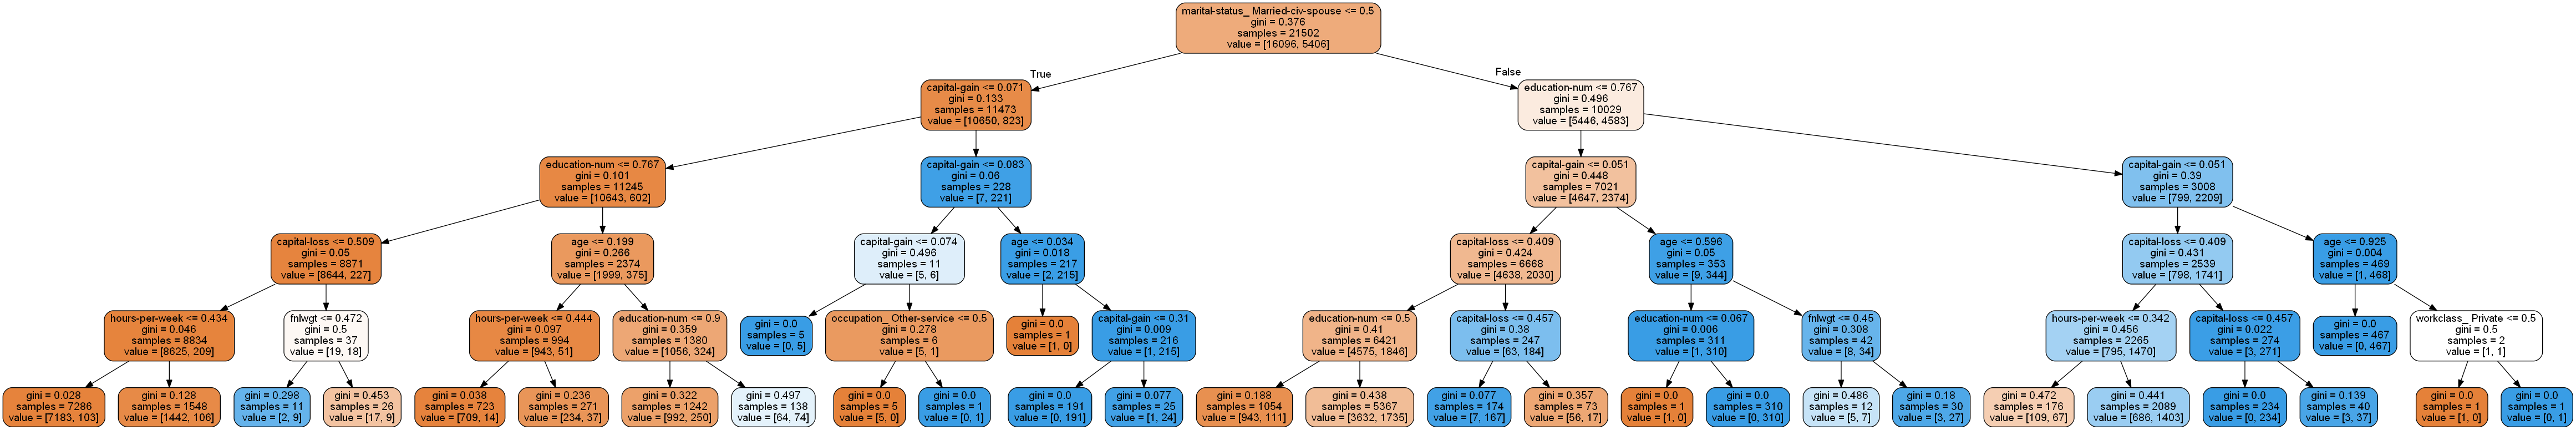

In [18]:
# If you're on windows: Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data, feature_names=features, filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [26]:
# Extract rules in textual manner
from sklearn import tree
string_data = tree.export_graphviz(dt_default, feature_names=features, out_file=None)

print(string_data)

digraph Tree {
node [shape=box] ;
0 [label="marital-status_ Married-civ-spouse <= 0.5\ngini = 0.376\nsamples = 21502\nvalue = [16096, 5406]"] ;
1 [label="capital-gain <= 0.071\ngini = 0.133\nsamples = 11473\nvalue = [10650, 823]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="education-num <= 0.767\ngini = 0.101\nsamples = 11245\nvalue = [10643, 602]"] ;
1 -> 2 ;
3 [label="capital-loss <= 0.509\ngini = 0.05\nsamples = 8871\nvalue = [8644, 227]"] ;
2 -> 3 ;
4 [label="hours-per-week <= 0.434\ngini = 0.046\nsamples = 8834\nvalue = [8625, 209]"] ;
3 -> 4 ;
5 [label="gini = 0.028\nsamples = 7286\nvalue = [7183, 103]"] ;
4 -> 5 ;
6 [label="gini = 0.128\nsamples = 1548\nvalue = [1442, 106]"] ;
4 -> 6 ;
7 [label="fnlwgt <= 0.472\ngini = 0.5\nsamples = 37\nvalue = [19, 18]"] ;
3 -> 7 ;
8 [label="gini = 0.298\nsamples = 11\nvalue = [2, 9]"] ;
7 -> 8 ;
9 [label="gini = 0.453\nsamples = 26\nvalue = [17, 9]"] ;
7 -> 9 ;
10 [label="age <= 0.199\ngini = 0.266\nsamples = 23

In [24]:
# Todo: Generate Rules on fly - Try implementing something this
# https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

# Hyperparameter Tuning

In [17]:
from KUtils.classifier import generic_classifier_utils as gcu
import importlib
importlib.reload(gcu)

<module 'KUtils.classifier.generic_classifier_utils' from 'D:\\projects\\datascience\\kesh-utils\\KUtils\\classifier\\generic_classifier_utils.py'>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=43)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:   15.1s finished


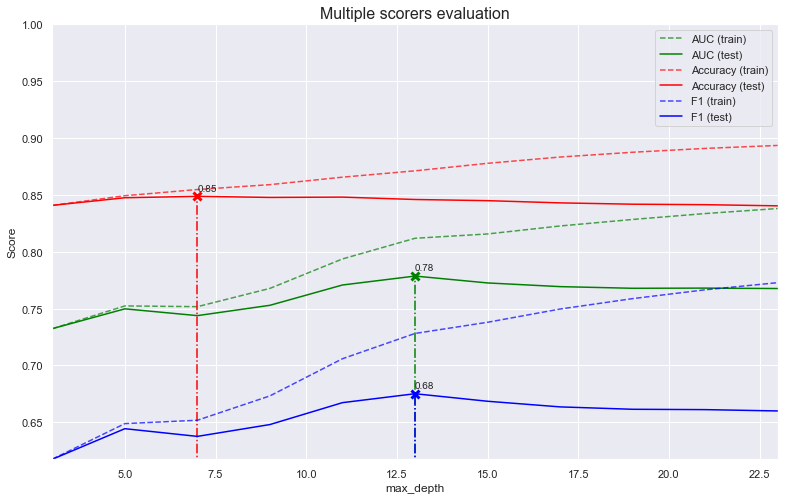

Best score 0.7786188866312181
Best Estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=25,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [21]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(X_train, y_train,
                                                cv_folds=10, 
                                                hyper_parameter_name='max_depth',
                                                hyper_parameter_range = range(3, 25, 2),
                                                classifier_algo=DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=25))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.6s finished


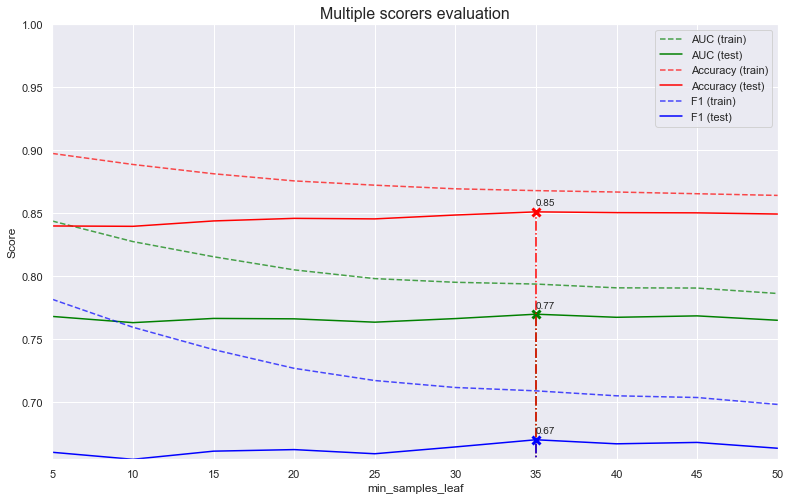

Best score 0.7697876438052588
Best Estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=35, min_samples_split=25,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [22]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(X_train, y_train,
                                                cv_folds=10, 
                                                hyper_parameter_name='min_samples_leaf',
                                                hyper_parameter_range =  range(5, 51, 5),
                                                classifier_algo=DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=25))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   33.5s finished


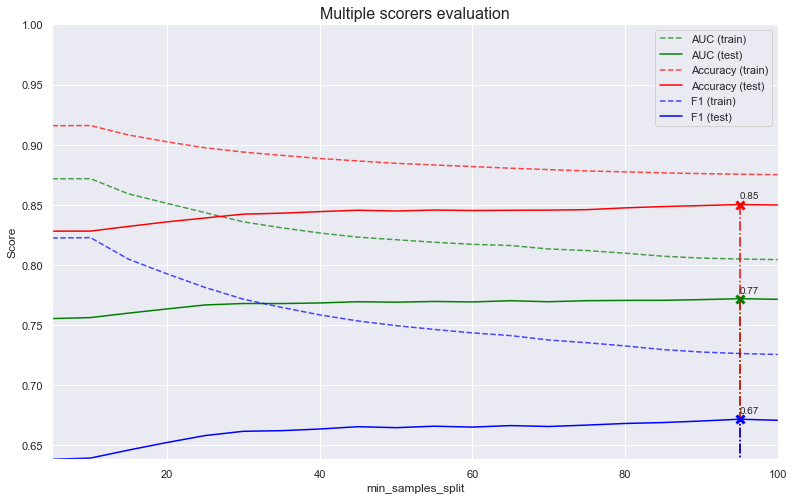

Best score 0.7719751314978742
Best Estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=95,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [23]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(X_train, y_train,
                                                cv_folds=10, 
                                                hyper_parameter_name='min_samples_split',
                                                hyper_parameter_range =  range(5, 101, 5),
                                                classifier_algo=DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=25))

# Put it all together (GridSearchCV)

In [24]:
### Try with multiple parameter (Grid Search to Find Optimal Hyperparameters) ###
n_folds = 10

param_grid = {
        'max_depth': range(11, 17, 1),
        'min_samples_leaf': range(30, 41, 2),
        'min_samples_split': range(80, 101, 5),
        'criterion': ['entropy', 'gini']
    }

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = n_folds, verbose = 1, scoring="accuracy", return_train_score=True)


# Fit the grid search to the data
grid_search.fit(X_train,y_train)

# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()



Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:  6.5min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.095205      0.003763           0.0021    7.000719e-04   
1       0.093405      0.001281           0.0018    4.000068e-04   
2       0.092705      0.001269           0.0020    1.784161e-07   
3       0.093305      0.001418           0.0019    3.000657e-04   
4       0.092905      0.001513           0.0017    4.582036e-04   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy              11                     30   
1         entropy              11                     30   
2         entropy              11                     30   
3         entropy              11                     30   
4         entropy              11                     30   

  param_min_samples_split                                             params  \
0                      80  {'criterion': 'entropy', 'max_depth': 11, 'min...   
1                      85  {'criterion': 'entropy', 'max_depth': 11, 'min...   
2                      90  {'criterion': 'entropy', 'max_depth': 11, 'min...   
3                      95  {'criterion': 'entropy', 'max_depth': 11, 'min...   
4                     100  {'criterion': 'entropy', 'max_depth': 11, 'min...   

   split0_test_score       ...         split2_train_score  split3_train_score  \
0           0.844723       ...                   0.857992            0.855519   
1           0.846583       ...                   0.857475            0.855519   
2           0.846583       ...                   0.857475            0.855054   
3           0.847048       ...                   0.857475            0.855054   
4           0.846583       ...                   0.857217            0.855054   

   split4_train_score  split5_train_score  split6_train_score  \
0            0.859446            0.857792            0.855674   
1            0.859446            0.857327            0.855105   
2            0.859446            0.857327            0.855105   
3            0.859446            0.857327            0.854899   
4            0.859446            0.857327            0.854899   

   split7_train_score  split8_train_score  split9_train_score  \
0            0.856346            0.856191            0.857386   
1            0.856346            0.855932            0.857025   
2            0.856346            0.855932            0.857025   
3            0.856139            0.855932            0.857025   
4            0.856139            0.855932            0.857025   

   mean_train_score  std_train_score  
0          0.856902         0.001165  
1          0.856613         0.001202  
2          0.856566         0.001252  
3          0.856515         0.001289  
4          0.856453         0.001289  

[5 rows x 34 columns]

In [25]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

best accuracy 0.8511301274300065
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=40, min_samples_split=80,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
{'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 40, 'min_samples_split': 80}


# Put it all together (RandomSearchCV)

In [26]:
from sklearn.model_selection import RandomizedSearchCV

### Try with multiple parameter (Grid Search to Find Optimal Hyperparameters) ###
n_folds = 10

param_grid = {
        'max_depth': range(11, 17, 1),
        'min_samples_leaf': range(30, 41, 2),
        'min_samples_split': range(80, 101, 5),
        'criterion': ['entropy', 'gini']
    }

dtree = DecisionTreeClassifier()

rdm_search = RandomizedSearchCV(estimator=dtree, param_distributions=param_grid, cv = n_folds, scoring="accuracy", return_train_score=True, n_jobs=-1)

# Fit the grid search to the data
rdm_search.fit(X_train,y_train)

# cv results
cv_results = pd.DataFrame(rdm_search.cv_results_)
#cv_results.head()

In [27]:
print("best accuracy", rdm_search.best_score_)
print(rdm_search.best_estimator_)
print(rdm_search.best_params_)

best accuracy 0.8499674448888476
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=40, min_samples_split=90,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
{'min_samples_split': 90, 'min_samples_leaf': 40, 'max_depth': 11, 'criterion': 'gini'}


In [24]:
# Running the model with best parameters obtained from grid search
# model with optimal hyperparameters\n",
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=11,min_samples_split=95, min_samples_leaf=36)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=36, min_samples_split=95,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [25]:
# Making predictions
y_pred_default = clf_gini.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

# Printing confusion matrix and accuracy
print(confusion_matrix(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6972
           1       0.76      0.59      0.66      2244

   micro avg       0.85      0.85      0.85      9216
   macro avg       0.82      0.77      0.79      9216
weighted avg       0.85      0.85      0.85      9216

[[6551  421]
 [ 919 1325]]
0.8546006944444444


In [26]:
# Accuracy, precision, recall and f1 score
local_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_default )

accuracy = metrics.accuracy_score(y_test, y_pred_default)
precision = metrics.precision_score(y_test, y_pred_default)
recall = metrics.recall_score(y_test, y_pred_default)
f1_score = metrics.f1_score(y_test, y_pred_default)
roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
sensitivity = recall
specificity =  local_confusion_matrix[0,0]/(local_confusion_matrix[0,0]+local_confusion_matrix[0,1])
print("Accuracy {0:.3f}, \nSensitivity {1:.3f}, \nSpecificity {2:.3f}, \nPrecision {3:.3f}, \nRecall {4:.3f}, \nf1_score {5:.3f}, \nroc_auc {6:.3f}".format(
    accuracy, sensitivity,specificity, precision,recall,f1_score,roc_auc))


Accuracy 0.855, 
Sensitivity 0.590, 
Specificity 0.940, 
Precision 0.759, 
Recall 0.590, 
f1_score 0.664, 
roc_auc 0.765


In [29]:
y_pred_proba_default = clf_gini.predict_proba(X_test)
gnb_df = pd.DataFrame({'row_id':y_test.index , 'Actual':y_test.values,'gnb_proba':y_pred_proba_default[:,1]})
gnb_df.to_csv('dt_dummy_df.csv', index=False)

# With Label encoder

In [19]:
adult_income_df = pd.read_csv('cleaned.csv')

In [20]:
# encode categorical variables using Label Encoder
# select all categorical variables
df_categorical = adult_income_df.select_dtypes(include=['object'])
df_categorical.head()

# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

# concat df_categorical with original df
adult_income_df = adult_income_df.drop(df_categorical.columns, axis=1)
adult_income_df = pd.concat([adult_income_df, df_categorical], axis=1)
adult_income_df.head()

age     fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39  11.258240             13          2174             0              40   
1   50  11.330336             13             0             0              13   
2   38  12.281393              9             0             0              40   
3   53  12.366153              7             0             0              40   
4   28  12.732011             13             0             0              40   

   workclass  education  marital-status  occupation  relationship  race  sex  \
0          5          9               4           0             1     4    1   
1          4          9               2           3             0     4    1   
2          2         11               0           5             1     4    1   
3          2          1               2           5             0     2    1   
4          2          9               2           9             5     2    0   

   native-country  target  
0               0       0  
1               0       0  
2               0       0  
3               0       0  
4               1       0

In [21]:
adult_income_df.tail()

age     fnlwgt  education-num  capital-gain  capital-loss  \
30713   27  12.458006             12             0             0   
30714   40  11.947134              9             0             0   
30715   58  11.931044              9             0             0   
30716   22  12.213495              9             0             0   
30717   52  12.570462              9         15024             0   

       hours-per-week  workclass  education  marital-status  occupation  \
30713              38          2          7               2          12   
30714              40          2         11               2           6   
30715              40          2         11               6           0   
30716              20          2         11               4           0   
30717              40          3         11               2           3   

       relationship  race  sex  native-country  target  
30713             5     4    0               0       0  
30714             0     4    1               0       1  
30715             4     4    0               0       0  
30716             3     4    1               0       0  
30717             5     4    0               0       1

In [22]:
# convert target variable income to categorical
adult_income_df['target'] = adult_income_df['target'].astype('category')

In [23]:
X = adult_income_df.drop('target', axis=1)
y = adult_income_df['target'] 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=43)

In [25]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
# Check the evaluation metrics of our default model

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6972
           1       0.78      0.55      0.64      2244

   micro avg       0.85      0.85      0.85      9216
   macro avg       0.82      0.75      0.77      9216
weighted avg       0.84      0.85      0.84      9216



In [27]:
# Accuracy, precision, recall and f1 score
local_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_default )

accuracy = metrics.accuracy_score(y_test, y_pred_default)
precision = metrics.precision_score(y_test, y_pred_default)
recall = metrics.recall_score(y_test, y_pred_default)
f1_score = metrics.f1_score(y_test, y_pred_default)
roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
sensitivity = recall
specificity =  local_confusion_matrix[0,0]/(local_confusion_matrix[0,0]+local_confusion_matrix[0,1])
print("Accuracy {0:.3f}, \nSensitivity {1:.3f}, \nSpecificity {2:.3f}, \nPrecision {3:.3f}, \nRecall {4:.3f}, \nf1_score {5:.3f}, \nroc_auc {6:.3f}".format(
    accuracy, sensitivity,specificity, precision,recall,f1_score,roc_auc))

Accuracy 0.851, 
Sensitivity 0.546, 
Specificity 0.949, 
Precision 0.775, 
Recall 0.546, 
f1_score 0.641, 
roc_auc 0.747


# Use the same Hyperparameter used in previous experiment and test

In [28]:
# Running the model with best parameters obtained from grid search
# model with optimal hyperparameters\n",
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=11,min_samples_split=85, min_samples_leaf=40)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=40, min_samples_split=85,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [29]:
# Making predictions
y_pred_default = clf_gini.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

# Printing confusion matrix and accuracy
print(confusion_matrix(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6972
           1       0.73      0.62      0.67      2244

   micro avg       0.85      0.85      0.85      9216
   macro avg       0.81      0.77      0.79      9216
weighted avg       0.85      0.85      0.85      9216

[[6450  522]
 [ 852 1392]]
0.8509114583333334


In [30]:
# Accuracy, precision, recall and f1 score
local_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_default )

accuracy = metrics.accuracy_score(y_test, y_pred_default)
precision = metrics.precision_score(y_test, y_pred_default)
recall = metrics.recall_score(y_test, y_pred_default)
f1_score = metrics.f1_score(y_test, y_pred_default)
roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
sensitivity = recall
specificity =  local_confusion_matrix[0,0]/(local_confusion_matrix[0,0]+local_confusion_matrix[0,1])
print("Accuracy {0:.3f}, \nSensitivity {1:.3f}, \nSpecificity {2:.3f}, \nPrecision {3:.3f}, \nRecall {4:.3f}, \nf1_score {5:.3f}, \nroc_auc {6:.3f}".format(
    accuracy, sensitivity,specificity, precision,recall,f1_score,roc_auc))


Accuracy 0.851, 
Sensitivity 0.620, 
Specificity 0.925, 
Precision 0.727, 
Recall 0.620, 
f1_score 0.670, 
roc_auc 0.773


In [31]:
y_pred_proba_default = clf_gini.predict_proba(X_test)
gnb_df = pd.DataFrame({'row_id':y_test.index , 'Actual':y_test.values,'dt_le_proba':y_pred_proba_default[:,1]})
gnb_df.to_csv('dt_le_df.csv', index=False)

In [32]:
# Feature importance
importances = clf_gini.feature_importances_
print(importances)

[5.34000460e-02 1.11820213e-02 2.22411748e-01 2.04338131e-01
 4.99495611e-02 3.86992050e-02 9.32101352e-03 2.45148211e-03
 5.07023444e-04 1.36591586e-02 3.92433651e-01 4.91044764e-06
 1.64204799e-03 0.00000000e+00]


In [33]:
unique_dict = dict(zip(X_train.columns, importances))

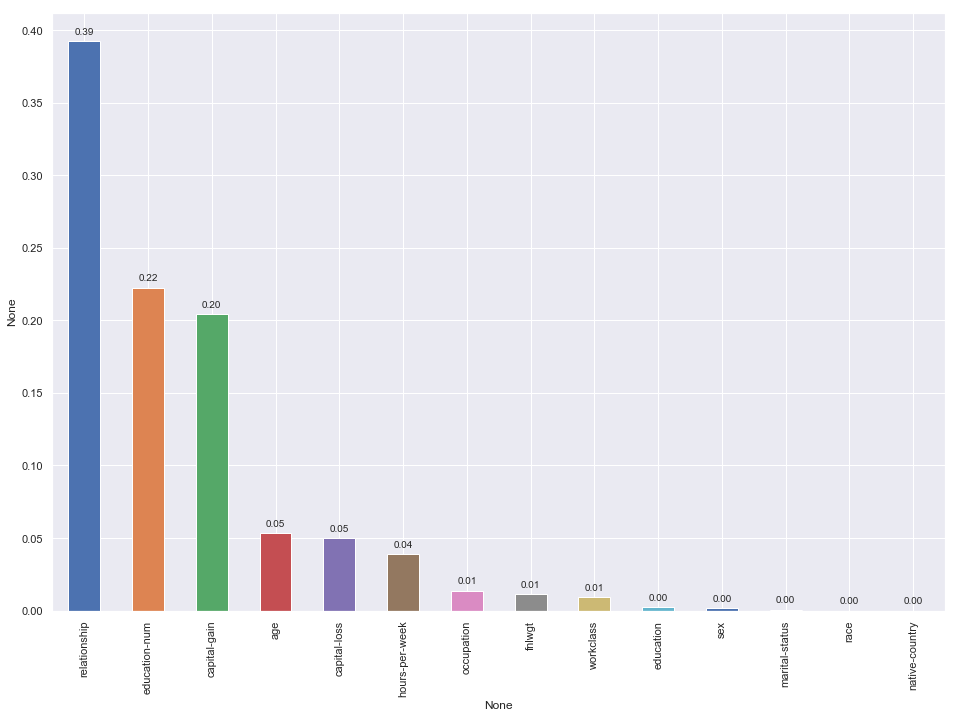

In [34]:
chartil.core_barchart_from_series(
    pd.Series(unique_dict), 
    optional_settings={'sort_by_value':True, 'decimal_precision':2}) 

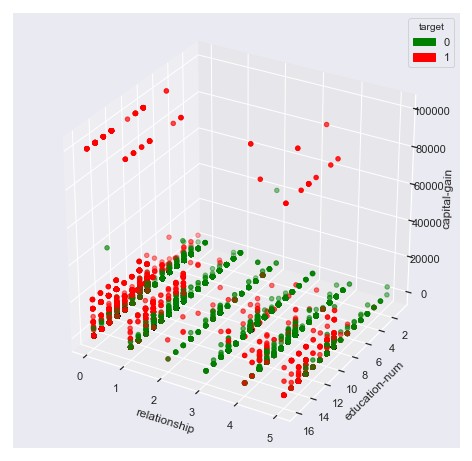

In [35]:
chartil.plot(adult_income_df, ['relationship','education-num', 'capital-gain',  'target'])

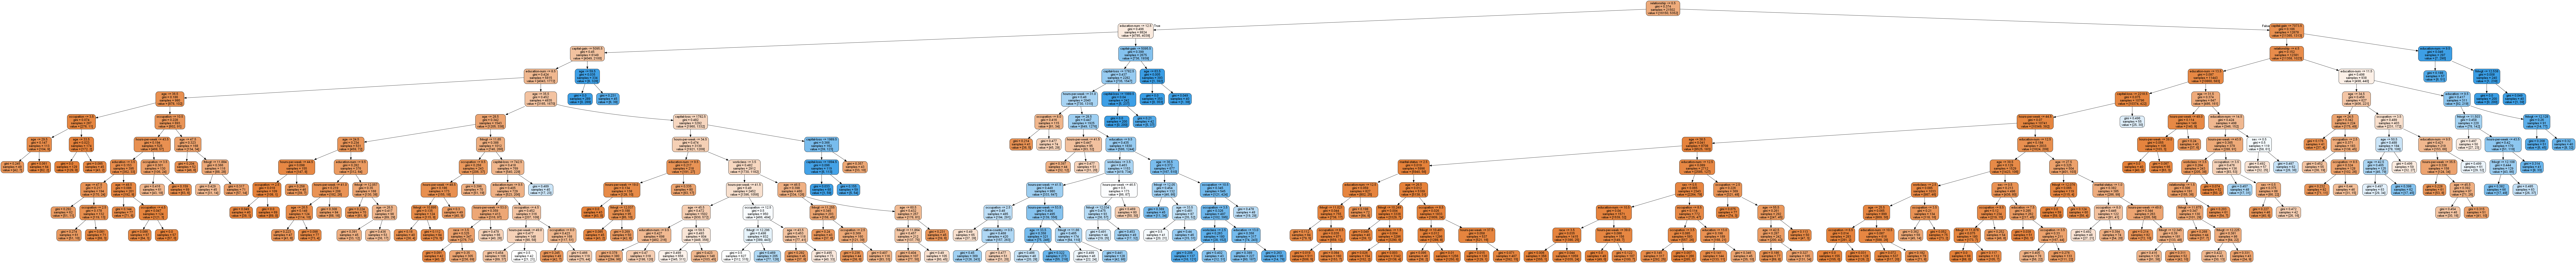

In [47]:
# If you're on windows: Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

# Putting features
features = list(X_train.columns)

# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data, feature_names=features, filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Label Encoder + Scaled + Tuned

In [36]:
adult_income_df = pd.read_csv('cleaned.csv')

In [37]:
# encode categorical variables using Label Encoder
# select all categorical variables
df_categorical = adult_income_df.select_dtypes(include=['object'])
df_categorical.head()

# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

# concat df_categorical with original df
adult_income_df = adult_income_df.drop(df_categorical.columns, axis=1)
adult_income_df = pd.concat([adult_income_df, df_categorical], axis=1)
adult_income_df.head()

age     fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39  11.258240             13          2174             0              40   
1   50  11.330336             13             0             0              13   
2   38  12.281393              9             0             0              40   
3   53  12.366153              7             0             0              40   
4   28  12.732011             13             0             0              40   

   workclass  education  marital-status  occupation  relationship  race  sex  \
0          5          9               4           0             1     4    1   
1          4          9               2           3             0     4    1   
2          2         11               0           5             1     4    1   
3          2          1               2           5             0     2    1   
4          2          9               2           9             5     2    0   

   native-country  target  
0               0       0  
1               0       0  
2               0       0  
3               0       0  
4               1       0

In [38]:
from sklearn.preprocessing import MinMaxScaler
numerical_column_names = ['age','fnlwgt','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = MinMaxScaler()

adult_income_df[numerical_column_names] = scaler.fit_transform(
    adult_income_df[numerical_column_names])

C:\Users\keshav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [39]:
adult_income_df.head()

age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.301370  0.369201       0.800000       0.02174           0.0   
1  0.452055  0.384604       0.800000       0.00000           0.0   
2  0.287671  0.587798       0.533333       0.00000           0.0   
3  0.493151  0.605907       0.400000       0.00000           0.0   
4  0.150685  0.684072       0.800000       0.00000           0.0   

   hours-per-week  workclass  education  marital-status  occupation  \
0        0.397959          5          9               4           0   
1        0.122449          4          9               2           3   
2        0.397959          2         11               0           5   
3        0.397959          2          1               2           5   
4        0.397959          2          9               2           9   

   relationship  race  sex  native-country  target  
0             1     4    1               0       0  
1             0     4    1               0       0  
2             1     4    1               0       0  
3             0     2    1               0       0  
4             5     2    0               1       0

In [40]:
X = adult_income_df.drop('target', axis=1)
y = adult_income_df['target'] 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=43)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.5s finished


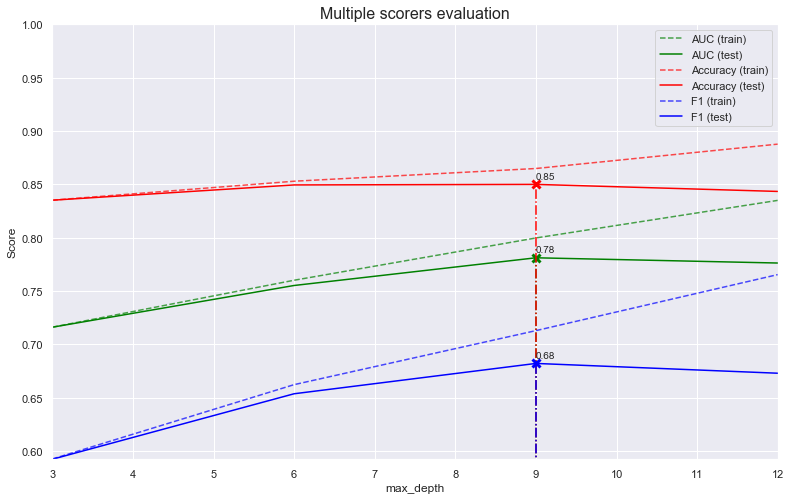

Best score 0.7812104588686991
Best Estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [54]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(X_train, y_train,
                                                cv_folds=10, 
                                                hyper_parameter_name='max_depth',
                                                hyper_parameter_range = range(3, 13, 3),
                                                classifier_algo=DecisionTreeClassifier())

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.9s finished


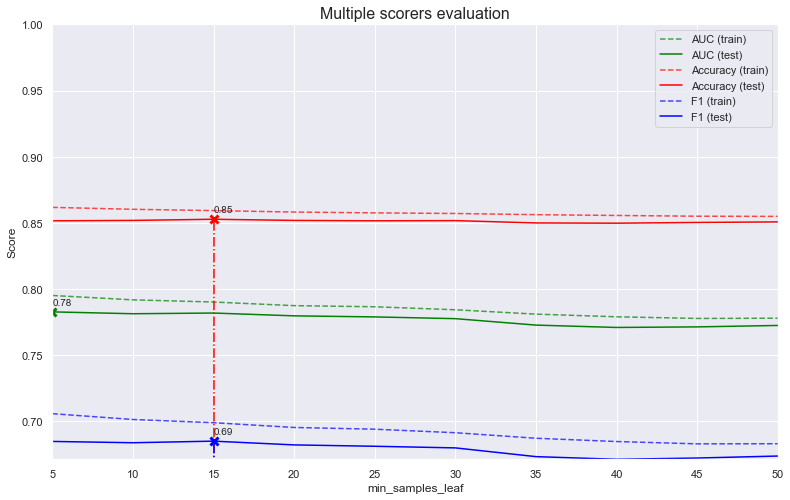

Best score 0.7827587927698219
Best Estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [55]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(X_train, y_train,
                                                cv_folds=10, 
                                                hyper_parameter_name='min_samples_leaf',
                                                hyper_parameter_range =  range(5, 51, 5),
                                                classifier_algo=DecisionTreeClassifier(max_depth=9))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   14.0s finished


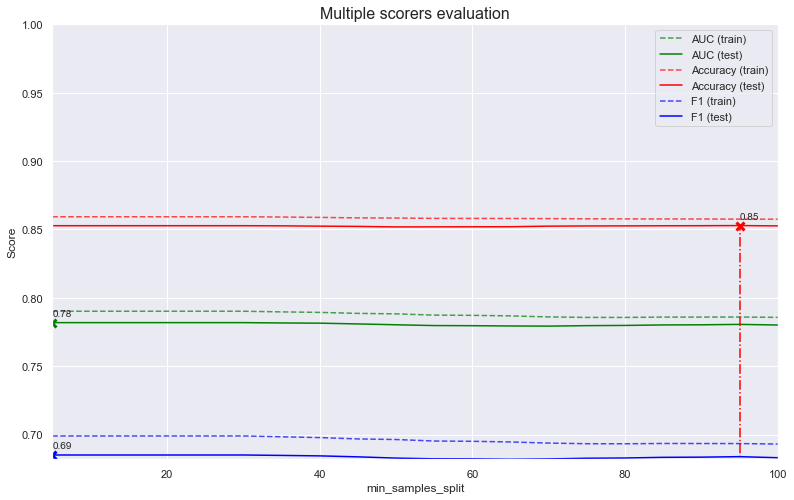

Best score 0.7818764301348762
Best Estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [56]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(X_train, y_train,
                                                cv_folds=10, 
                                                hyper_parameter_name='min_samples_split',
                                                hyper_parameter_range =  range(5, 101, 5),
                                                classifier_algo=DecisionTreeClassifier(max_depth=9, min_samples_leaf=15))

# Final model

In [42]:
# Running the model with best parameters obtained from grid search
# model with optimal hyperparameters\n",
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 43,
                                  max_depth=9,min_samples_split=95, min_samples_leaf=15)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=95,
            min_weight_fraction_leaf=0.0, presort=False, random_state=43,
            splitter='best')

In [43]:
# Making predictions
y_pred_default = clf_gini.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

# Printing confusion matrix and accuracy
print(confusion_matrix(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6972
           1       0.70      0.65      0.68      2244

   micro avg       0.85      0.85      0.85      9216
   macro avg       0.80      0.78      0.79      9216
weighted avg       0.84      0.85      0.85      9216

[[6346  626]
 [ 776 1468]]
0.8478732638888888


In [44]:
# Accuracy, precision, recall and f1 score
local_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_default )

accuracy = metrics.accuracy_score(y_test, y_pred_default)
precision = metrics.precision_score(y_test, y_pred_default)
recall = metrics.recall_score(y_test, y_pred_default)
f1_score = metrics.f1_score(y_test, y_pred_default)
roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
sensitivity = recall
specificity =  local_confusion_matrix[0,0]/(local_confusion_matrix[0,0]+local_confusion_matrix[0,1])
print("Accuracy {0:.3f}, \nSensitivity {1:.3f}, \nSpecificity {2:.3f}, \nPrecision {3:.3f}, \nRecall {4:.3f}, \nf1_score {5:.3f}, \nroc_auc {6:.3f}".format(
    accuracy, sensitivity,specificity, precision,recall,f1_score,roc_auc))


Accuracy 0.848, 
Sensitivity 0.654, 
Specificity 0.910, 
Precision 0.701, 
Recall 0.654, 
f1_score 0.677, 
roc_auc 0.782


In [45]:
# Feature importance
importances = clf_gini.feature_importances_
print(importances)

[0.04813343 0.0068659  0.22428009 0.21166634 0.053337   0.03151869
 0.00937374 0.00303133 0.00046753 0.01258789 0.39574681 0.00093997
 0.00109975 0.00095153]


In [46]:
unique_dict = dict(zip(X_train.columns, importances))

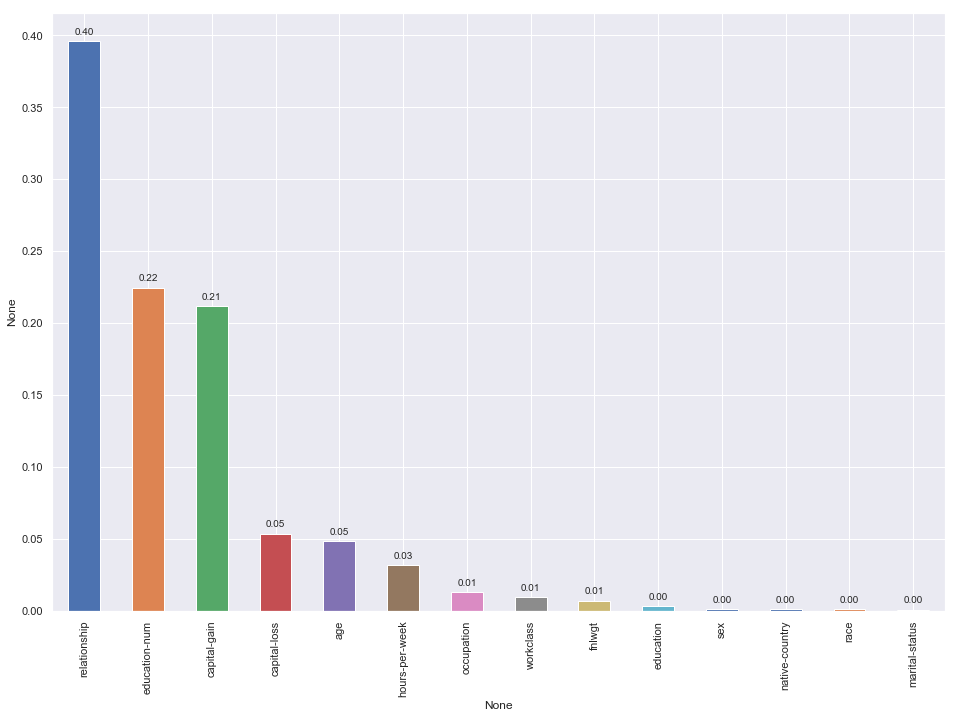

In [47]:
chartil.core_barchart_from_series(
    pd.Series(unique_dict), 
    optional_settings={'sort_by_value':True, 'decimal_precision':2}) 

# Summary

- DT on Dummy and Scaled:
    - Accuracy 0.845, Precision 0.764, Recall 0.545, f1_score 0.637, roc_auc 0.745, Sensitivity 0.545, Specificity 0.944
- DT on Dummy and Scaled + Tuned:
    - Accuracy 0.848, Precision 0.802, Recall 0.519, f1_score 0.630, roc_auc 0.738, Sensitivity 0.519, Specificity 0.957
- DT using Label Encoder:
    - Accuracy 0.843, Precision 0.789, Recall 0.505, f1_score 0.616, roc_auc 0.730, Sensitivity 0.505, Specificity 0.955
- DT using Label Encoder + Tuned:
    - Accuracy 0.847, Precision 0.737, Recall 0.602, f1_score 0.663, roc_auc 0.765, Sensitivity 0.602, Specificity 0.928
- DT using Label Encoder + Scaled + Tuned:
    - Accuracy 0.848, Precision 0.701, Recall 0.654, f1_score 0.677, roc_auc 0.782, Sensitivity 0.654, Specificity 0.910

In [64]:
# Go for LabelEncoder + Scaled Numericals + Hyperparatmeter tuned

In [50]:
# Interpret model using ELI5
import eli5
from eli5.sklearn import PermutationImportance

In [56]:
eli5.show_weights(clf_gini)

# For fun - Use probability to plot 'Accuracy','Sensitivity','Specificity' chart

In [65]:
y_pred_default_prob = clf_gini.predict_proba(X_test)

In [66]:
# First(0) column contains prob for 0-class and second(1) contains prob for 1-class
test_pred_df = pd.DataFrame({'Actual':y_test.values, 'Probability':y_pred_default_prob[:,1]}) 

In [67]:
return_dictionary = autoglm.calculateGLMKpis(test_pred_df, cutoff_by='Sensitivity-Specificity', include_cutoff_df_in_return=True)

NameError: name 'autoglm' is not defined

In [ ]:
cutoff_df = return_dictionary['cutoff_df']

In [ ]:
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [ ]:
cutoff_df.plot.line(x='Probability', y=['Precision','Recall'])
plt.show()